
# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A patient makes a doctor appointment, receives all the instructions and still doesn't show. Why do 30% of the patients miss their scheduled appointments?
The dataset information is collected from 100k medical appointments in Brazil .
Data Definition:

 - PatientId: Identification of a patient that is unique for each person.
 - AppointmentID: Identification of each appointment.
 - Gender: Male or Female.
 - AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
 - ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
 - Age: How old is the patient.
 - Neighbourhood: Where the appointment takes place.
 - Scholarship: 1 or 0.
 - Hipertension: 1 or 0.
 - Diabetes: 1 or 0.
 - Alcoholism: 1 or 0.
 - Handcap: 1 or 0.
 - SMS_received: 1 or more messages sent to the patient.
 - No-show: "Yes" or "No".


## Questions to Explore:

Here are some questions that we will have to answer while we explore the data

 - What is the percentage of patients who show up vs. who don't?
 - Is the Attendance influenced by gender?
 - Does Age influence Attendance?
 - Is the Attendance affected by a patient who is diagnosed with Diabetes, Hypertension, Alcoholism, or if a patient has a scholarship?
 - Does receiving the SMS influence showing up?
 - Is the Attendance affected by the severity of the Handicap?

In [185]:
# importing the libraries we need in our analyzing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Data Assessing

In [186]:
# Load the csv file into dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


# view the first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [187]:
#check dataframe shape
df.shape

(110527, 14)

In [188]:
# check info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [189]:
#check for duplicates
df.duplicated().sum()


0

In [190]:
# check for number of the unique values for each column
columns = list(df.columns.values)
for i in columns:
    number_unique_value = df[i].nunique()    
    print( "number of unique values in {} is :".format(i) , number_unique_value)    

number of unique values in PatientId is : 62299
number of unique values in AppointmentID is : 110527
number of unique values in Gender is : 2
number of unique values in ScheduledDay is : 103549
number of unique values in AppointmentDay is : 27
number of unique values in Age is : 104
number of unique values in Neighbourhood is : 81
number of unique values in Scholarship is : 2
number of unique values in Hipertension is : 2
number of unique values in Diabetes is : 2
number of unique values in Alcoholism is : 2
number of unique values in Handcap is : 5
number of unique values in SMS_received is : 2
number of unique values in No-show is : 2


In [191]:
# check for the unique values in some columns
col = list(df.columns.values)
for i in col:
    if i not in ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']:
        unique_values = df[i].unique()
        print( "number of unique value in {} is :".format(i) , unique_values )
  

number of unique value in Gender is : ['F' 'M']
number of unique value in Age is : [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
number of unique value in Scholarship is : [0 1]
number of unique value in Hipertension is : [1 0]
number of unique value in Diabetes is : [0 1]
number of unique value in Alcoholism is : [0 1]
number of unique value in Handcap is : [0 1 2 3 4]
number of unique value in SMS_received is : [0 1]
number of unique value in No-show is : ['No' 'Yes']


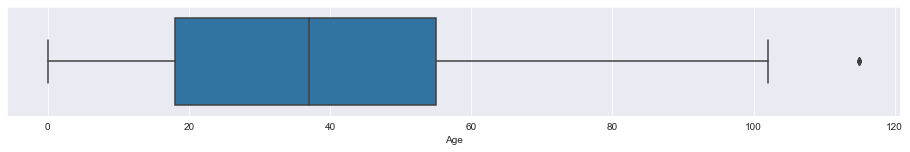

In [192]:
# an overview look for age using boxplot
plt.figure(figsize=(16,2))
sns.boxplot(x=df_clean.Age);

In [193]:
# check if some of the same patients has several appointments
sum(df.PatientId.duplicated())

48228

#### Observations

 - No null values found
 - AppointmentID has no duplicates
 - Some column names has wrong spelling
 - "No-show" values are not clear , more explanation is on this page https://www.kaggle.com/joniarroba/noshowappointments/discussion/41034 , ("No" means they showed up on their appointments while "Yes" means they didn't!)
 - "PatientId" & "AppointmentID" datatypes are floats & integers instead of strings
 - "ScheduledDay" & "AppointmentDay" datatypes are strings instead of datetime
 - Age has negative values and outliers
 - Handcap has 5 values from 0 to 4 , for number of handicaps the patient has https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356
 - Scholarship,	Hipertension, Diabetes , Alcoholism , Handcap, SMS_received datatypes are integers  
 

### Data Cleaning 

#### Make a copy for the data frame to clean

In [194]:
df_clean = df.copy()

#### Clean & rename columns headers
 - Correct the misspelled columns
 - change "no-show" to be "Attendance"
 

In [195]:
#rename columns
df_clean.rename(columns = {'Hipertension':'Hypertension' , "Handcap" :'Handicap', "No-show" :"Attendance" }, inplace = True)
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Fix "PatientId" & "AppointmentID" datatypes to strings
  

In [196]:
#### change "PatientId" & "AppointmentID" datatypes to strings
df_clean['PatientId'] = df_clean['PatientId'].astype(str).str[:-2]
df_clean['AppointmentID'] = df_clean['AppointmentID'].astype(str)

#test outcome

#check new datatypes and test it didn't affect our dataframe unique values
print ("PatientId datatype is {}, and the number of unique values is {}".format(df_clean['PatientId'].dtypes, df_clean['PatientId'].nunique()))
print ("AppointmentID datatype is {}, and the number of unique values is {}".format(df_clean['AppointmentID'].dtypes , df_clean['AppointmentID'].nunique()))

#display first 2 rows
df_clean.head(2)

PatientId datatype is object, and the number of unique values is 62299
AppointmentID datatype is object, and the number of unique values is 110527


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Clean "ScheduledDay" & "AppointmentDay" columns.
 - Change "ScheduledDay" & "AppointmentDay" datatypes into Datetime
 - We could find the waiting period between both days.
 - Time in both columns is not relevent to our analysis

In [197]:
# change "ScheduledDay" & "AppointmentDay" datatypes into Datetime
df_clean["ScheduledDay"] = pd.to_datetime(df_clean['ScheduledDay']).dt.date.astype('datetime64[ns]')
df_clean["AppointmentDay"] = pd.to_datetime(df_clean['AppointmentDay']).dt.date.astype('datetime64[ns]')

#check outcome
print (df_clean["ScheduledDay"].dtypes ,df_clean["AppointmentDay"].dtypes)
df_clean.head()

datetime64[ns] datetime64[ns]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [198]:
# create a column for the waiting period between the days
df_clean['waitingperiod'] =  (df_clean['AppointmentDay'] - df_clean['ScheduledDay']).astype(str)
#check outcome
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,waitingperiod
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [199]:
#check for number of days less than 0
df_clean[df_clean['waitingperiod'] < '0 days']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,waitingperiod
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


number of rows that has "waitingperiod" < 0, are only 5, we can drop these data

In [200]:
df_clean.drop(df_clean[df_clean['waitingperiod'] < '0 days'].index, inplace = True)

#check for number of days less than 0
df_clean[df_clean['waitingperiod'] < '0 days']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,waitingperiod


In [201]:
# check the dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110522 non-null  object        
 1   AppointmentID   110522 non-null  object        
 2   Gender          110522 non-null  object        
 3   ScheduledDay    110522 non-null  datetime64[ns]
 4   AppointmentDay  110522 non-null  datetime64[ns]
 5   Age             110522 non-null  int64         
 6   Neighbourhood   110522 non-null  object        
 7   Scholarship     110522 non-null  int64         
 8   Hypertension    110522 non-null  int64         
 9   Diabetes        110522 non-null  int64         
 10  Alcoholism      110522 non-null  int64         
 11  Handicap        110522 non-null  int64         
 12  SMS_received    110522 non-null  int64         
 13  Attendance      110522 non-null  object        
 14  waitingperiod   110522 non-null  obj

#### Fix age column by removing the negative values, and check if we need to remove te outliers

In [202]:
#check for Ages less than 0 
df_clean[df_clean['Age'] <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,waitingperiod
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0 days


In [203]:
# Drop the row
df_clean = df_clean[(df_clean.Age >= 0)]

In [204]:
# check the outliers in age
df_clean[df_clean['Age'] >100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,waitingperiod
58014,976294799775439,5651757,F,2016-05-03,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No,0 days
63912,31963211613981,5700278,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,3 days
63915,31963211613981,5700279,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,3 days
68127,31963211613981,5562812,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes,38 days
76284,31963211613981,5744037,F,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No,0 days
90372,234283596548,5751563,F,2016-05-31,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No,2 days
97666,748234579244724,5717451,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No,15 days


> - There are outliers in ages above 100, after checking the data no need to drop all of them as most patients has showed for the appointments 
> - The no show data is for the same PatientId with different AppoinmentID, however 2 Appointments are scheduled on the same day and not showed, it could be wrong or duplicated entry , so we can remove it

In [205]:
# drop the duplicated entry row #63915
df_clean = df_clean.drop([63915])

In [206]:
# test Data fram 2 rows should be removed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110520 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110520 non-null  object        
 1   AppointmentID   110520 non-null  object        
 2   Gender          110520 non-null  object        
 3   ScheduledDay    110520 non-null  datetime64[ns]
 4   AppointmentDay  110520 non-null  datetime64[ns]
 5   Age             110520 non-null  int64         
 6   Neighbourhood   110520 non-null  object        
 7   Scholarship     110520 non-null  int64         
 8   Hypertension    110520 non-null  int64         
 9   Diabetes        110520 non-null  int64         
 10  Alcoholism      110520 non-null  int64         
 11  Handicap        110520 non-null  int64         
 12  SMS_received    110520 non-null  int64         
 13  Attendance      110520 non-null  object        
 14  waitingperiod   110520 non-null  obj

#### Fix the Gender, Scholarship, Hypertension ,  Diabetes , Alcoholism ,  Handicap  , SMS_received and Attendance  columns for better understanding

- We will start first with Hypertension , Diabetes , Alcoholism & SMS_received , as they have only 0 & 1 values in thier data

In [207]:
# check for number of values in each one
cols = ["Scholarship","Hypertension" , "Diabetes" , "Alcoholism" , "SMS_received"]
for i in cols:
    count_of_0 = (df_clean[i] == 0).sum()
    count_of_1 = (df_clean[i] == 1).sum()
    print ('The number of (0) in column {} is '.format(i), count_of_0,"\n"
             'The number of (1) in column {} is '.format(i), count_of_1, "\n")

The number of (0) in column Scholarship is  99659 
The number of (1) in column Scholarship is  10861 

The number of (0) in column Hypertension is  88719 
The number of (1) in column Hypertension is  21801 

The number of (0) in column Diabetes is  102577 
The number of (1) in column Diabetes is  7943 

The number of (0) in column Alcoholism is  107160 
The number of (1) in column Alcoholism is  3360 

The number of (0) in column SMS_received is  75038 
The number of (1) in column SMS_received is  35482 



In [208]:
#function to convert the 0 to "No" and 1 to "Yes"
def change_values (df_clean, category):
    df_clean[category] = (df_clean[category].map({0: 'No', 1: 'Yes'})).astype('category') 
    return category

In [209]:
# apply the function to the list of columns needed to change
for i in cols:
    updates = change_values (df_clean , i)
    # Test for number of values in each one to compare it whith previous values
    count_of_no = (df_clean[i] == "No").sum() 
    count_of_yes = (df_clean[i] == "Yes").sum()
    print ('The number of (No) in column {} is '.format(i), count_of_no,"\n"
             'The number of (Yes) in column {} is '.format(i), count_of_yes, "\n")

The number of (No) in column Scholarship is  99659 
The number of (Yes) in column Scholarship is  10861 

The number of (No) in column Hypertension is  88719 
The number of (Yes) in column Hypertension is  21801 

The number of (No) in column Diabetes is  102577 
The number of (Yes) in column Diabetes is  7943 

The number of (No) in column Alcoholism is  107160 
The number of (Yes) in column Alcoholism is  3360 

The number of (No) in column SMS_received is  75038 
The number of (Yes) in column SMS_received is  35482 



 - Convert the values in Attendance from "No" to "show" and  from "yes" to "no_show" for better understanding
 - Convert "Gender" & "No_show"  column type to 'category'

In [210]:
# Fix Attendance columns
df_clean["Attendance"] = (df_clean["Attendance"].map({'No': "show", 'Yes': "no_show"})).astype('category')

In [211]:
# Fix Gendercolumns
df_clean["Gender"] = df_clean["Gender"].astype('category')


Rename Handicap values to a meaningful names and change its type to category

In [212]:
#check on the values before changes
print ( "count_0 = ", (df_clean['Handicap'] == 0).sum(),
        "count_1 = ", (df_clean['Handicap'] == 1).sum(),
        "count_2 = ",  (df_clean['Handicap'] == 2).sum(),
        "count_3 = ",  (df_clean['Handicap'] == 3).sum(),
        "count_4 = ",  (df_clean['Handicap'] == 4).sum())

count_0 =  108282 count_1 =  2039 count_2 =  183 count_3 =  13 count_4 =  3


In [213]:
# rename values and change type
df_clean['Handicap'] = (df_clean['Handicap'].map({0: "No disability ", 1: "1 disabilities"  ,2: "2 disabilities", 3: "3 disabilities", 4: "4 disabilities" })).astype('category')


#check on the values before changes
print ( "count_0 = ", (df_clean['Handicap'] == "No disability ").sum(),
        "count_1 = ", (df_clean['Handicap'] == "1 disabilities" ).sum(),
        "count_2 = ",  (df_clean['Handicap'] == "2 disabilities").sum(),
        "count_3 = ",  (df_clean['Handicap'] == "3 disabilities").sum(),
        "count_4 = ",  (df_clean['Handicap'] == "4 disabilities").sum())

count_0 =  108282 count_1 =  2039 count_2 =  183 count_3 =  13 count_4 =  3


In [214]:
#test changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110520 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110520 non-null  object        
 1   AppointmentID   110520 non-null  object        
 2   Gender          110520 non-null  category      
 3   ScheduledDay    110520 non-null  datetime64[ns]
 4   AppointmentDay  110520 non-null  datetime64[ns]
 5   Age             110520 non-null  int64         
 6   Neighbourhood   110520 non-null  object        
 7   Scholarship     110520 non-null  category      
 8   Hypertension    110520 non-null  category      
 9   Diabetes        110520 non-null  category      
 10  Alcoholism      110520 non-null  category      
 11  Handicap        110520 non-null  category      
 12  SMS_received    110520 non-null  category      
 13  Attendance      110520 non-null  category      
 14  waitingperiod   110520 non-null  obj

In [215]:
df_clean.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,waitingperiod
79436,6726454752686,5675426,M,2016-05-09,2016-05-12,0,ILHA DAS CAIEIRAS,No,No,No,No,No disability,No,show,3 days
107782,1574579287766,5772170,M,2016-06-03,2016-06-03,59,NAZARETH,No,No,No,No,No disability,No,show,0 days
75255,58623823676953,5656659,F,2016-05-04,2016-05-04,58,NOVA PALESTINA,No,Yes,Yes,No,No disability,No,show,0 days
21920,4176778783932,5682729,F,2016-05-10,2016-05-18,60,GRANDE VITÓRIA,No,Yes,Yes,No,No disability,No,no_show,8 days
35803,6617231511232,5634857,F,2016-04-28,2016-05-05,6,DA PENHA,Yes,No,No,No,No disability,No,show,7 days


#### Save cleaned data in a new csv file

In [216]:
df_clean.to_csv('clean_dataset.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> Now we will start Exploring and answering the questions that were posed at the begaining.

> - Lets revisit the questions again.

#### Questions 

 - What is the percentage of patients who show up vs. who don't?
 - Is the Attendance influenced by gender?
 - Does Age influence Attendance?
 - Is the Attendance affected by a patient who is diagnosed with Diabetes, Hypertension, Alcoholism, or if a patient has a scholarship?
 - Does receiving the SMS influence showing up?
 - Is the Attendance affected by the severity of the Handicap?
---


### Question 1 : What is the percentage of patients who show up vs. who don't?

 * check overall Attendance

In [217]:
# check the value count of all attendance
df_clean["Attendance"].value_counts()

show       88207
no_show    22313
Name: Attendance, dtype: int64

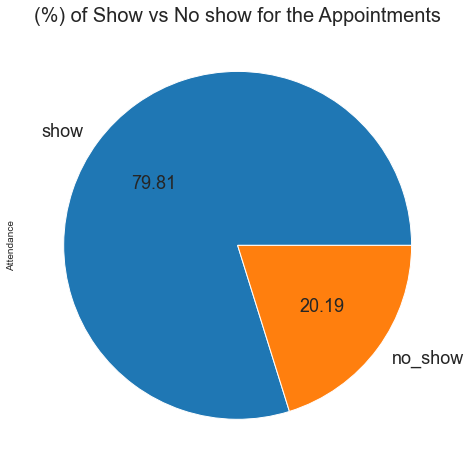

In [218]:
#represet the attendance percentage with pie chart
plt.title ("(%) of Show vs No show for the Appointments", fontsize=20)
df_clean["Attendance"].value_counts().plot(figsize=(8,8),kind="pie",autopct='%.2f', textprops={'fontsize': 18});

 > We notice that more patients are committed to showing up to the appointments, their percentage are 79,81%. while the percentage of the patients who didn't show is 20.19%

----
----
### Question 2 : Is the Attendance influenced by gender?

* check overall Appointmens made by gender

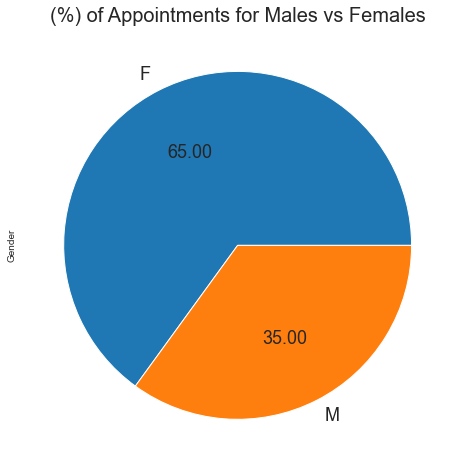

In [219]:
# #represet the percentage of each gender in making appointments with pie chart
plt.title ("(%) of Appointments for Males vs Females", fontsize=20)
df_clean["Gender"].value_counts().plot(figsize=(8,8),kind="pie",autopct='%.2f',textprops={'fontsize': 18});

> More women make appointments than men represented by 65% of the total appointments while men are only 35%

----
* compare using bar chart

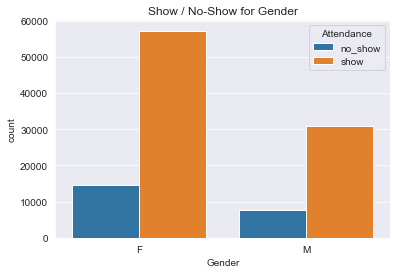

In [220]:
ax = sns.countplot(x=df_clean.Gender, hue=df_clean.Attendance, data=df)
ax.set_title("Show / No-Show for Gender")
x_ticks_labels=['Female', 'Male']
plt.show();

> - That was and overview comparison for the number of patients in terms of attendance, We notice that the number of Female patients is higher in both showing and not-showing, compared to the male patinents, which is understandable , due to higher number of appointments for the females as we have seen before.
> - Next we will compare both of them using percantage and pie chart to show level of commitment

----
* compare between showing and not showing in terms of the Gender

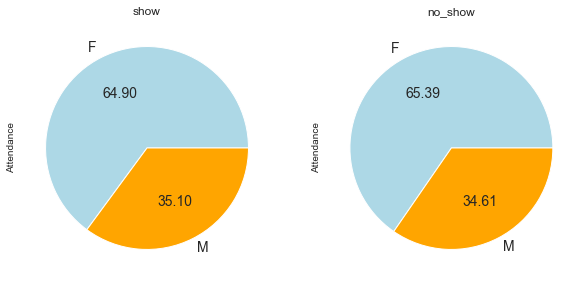

In [221]:
fig, axs = plt.subplots(1,2)
df_clean[df_clean["Attendance"]=="show"].groupby("Gender")["Attendance"].count().plot(figsize=(10,10),kind="pie",autopct='%.2f', ax=axs[0],colors=['lightblue','orange'],title="show",textprops={'fontsize': 14});
df_clean[df_clean["Attendance"]=="no_show"].groupby("Gender")["Attendance"].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1],colors=['lightblue','orange'],title="no_show", textprops={'fontsize': 14});

 > - 64.90% of the patients who show for their appointments are females, while  males represents 35.5 % of showing.
 > - Also a high percentage for not showing is represented by females by 65.39% while males are 34.61%
 > - Like before when compare between showing and not showing for genders the percentage of Females is higher that males, due to higher number of appointments made by the  females. However the commitment for males are slightly higher, and it will be more clarified in the next chart

----
- compare between the the Genders in terms of the Attendance

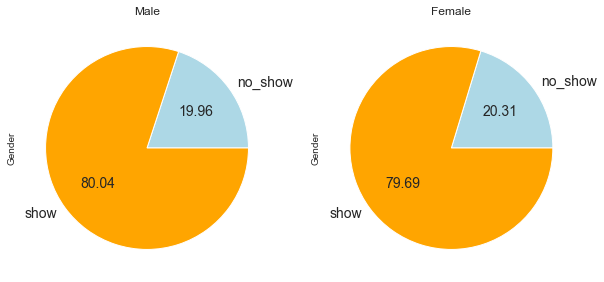

In [222]:
fig, axs = plt.subplots(1,2)
df_clean[df_clean["Gender"]=="M"].groupby("Attendance")["Gender"].count().plot(figsize=(10,10),kind="pie",autopct='%.2f', ax=axs[0],colors=['lightblue','orange'],title="Male",textprops={'fontsize': 14});
df_clean[df_clean["Gender"]=="F"].groupby("Attendance")["Gender"].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1],colors=['lightblue','orange'],title="Female",textprops={'fontsize': 14});

> - The percentage of showing for the males is 80.04% of the appointments and the no show is 19.96
> - While the females have 79.69% of showing up and 20.31% of not showing
> - Here we can clearly see that the percentage of Males commited to attend the appointment is slightly higher than the females by 0.35% 

----
----
### Question 3 : Does Age influence Attendance?

* Show the all Number of appointments scheduled by age

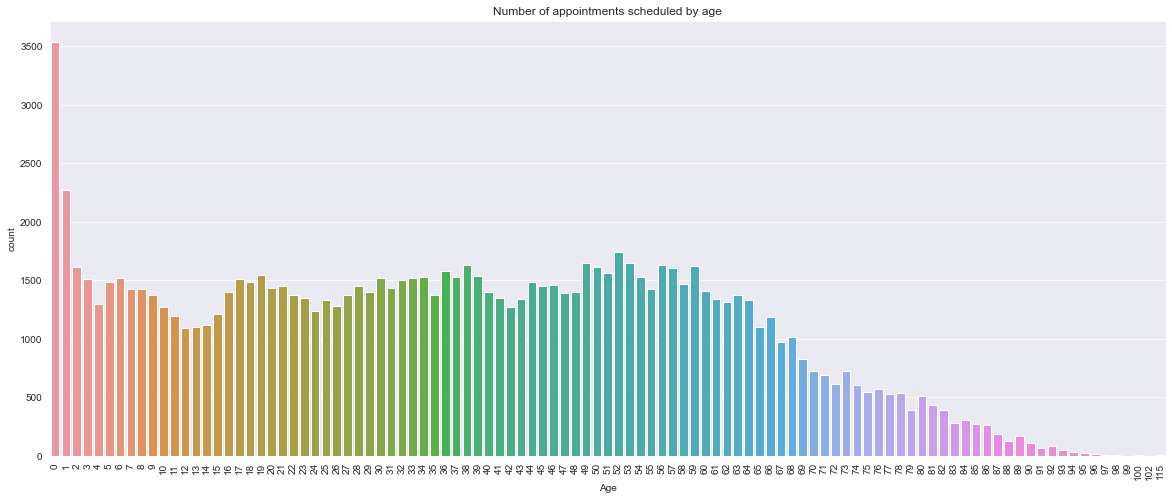

In [223]:
# an overview look of number of patients of each age
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_clean.Age)
ax.set_title("Number of appointments scheduled by age")
plt.show()


> - The above histogram shows higher appoinments for young patients aged from 0 to 1 "the largest number of appointments" , and a higher peak in appointments in older ages from 50 years old to 60 years old

 * Compare between show and no show patients in terms of age

In [224]:
# make a show and no_show variables for easier analysis
show = df_clean.Attendance == 'show'
no_show = df_clean.Attendance == 'no_show'

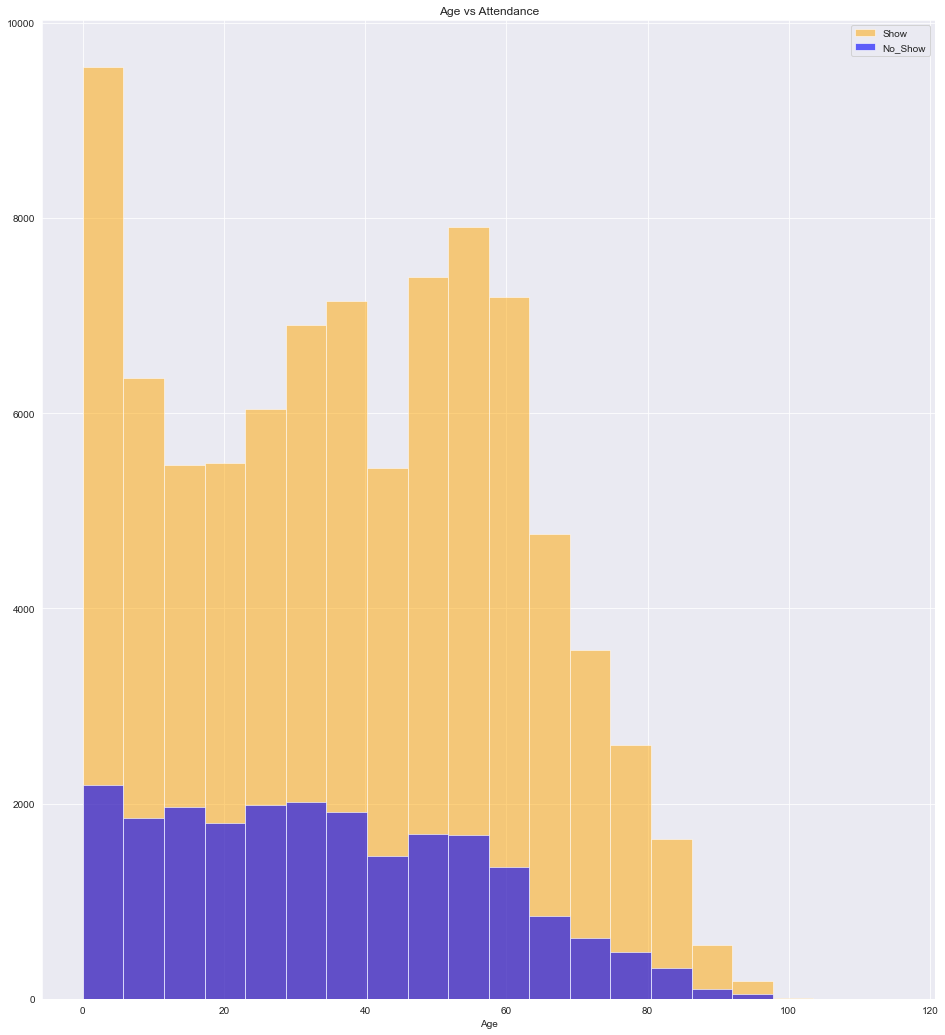

In [225]:
#creat a histograme showing both shows and no-shows by age
df_clean.Age[show].hist(color='orange', label='Show',alpha=0.5, bins=20, figsize = (16,18));
df_clean.Age[no_show].hist(color='blue', label='No_Show', alpha=0.6, bins=20, figsize = (16,18));
plt.legend()
plt.title('Age vs Attendance')
plt.xlabel('Age');
fig.set_size_inches(6,20)

> This histogram shows us that  patients from ages 50 to 80 are more committed to attend their appointments.

----
----
### Question 4 : Is the Attendance affected by a patient who is diagnosed with Diabetes, Hypertension, Alcoholism, or by a patient who have a scholarship?

* It will be easier to check the data if we created a function to avoid repetitive steps

In [226]:
# creat a function to return a bar plot to compare Show vs No_Show for different aspects.
def bar_plots(df_clean, category):
    df_clean_category = pd.crosstab(df_clean[category], df_clean.Attendance, normalize = 'index')
    df_clean_category = np.round((df_clean_category * 100), decimals=2)
    ax = df_clean_category.plot.bar(figsize=(10,5));
    ax.set_title('\n Show vs No_Show in (%) (by {} )\n'.format(df_clean_category.index.name), fontsize = 15)
    ax.set_ylabel('(%)')
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches
    # add labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_clean_category

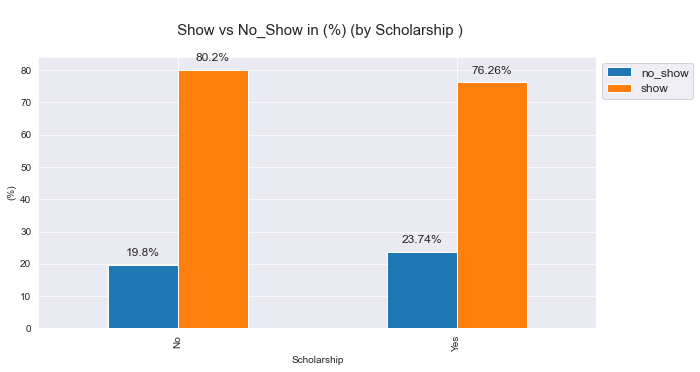

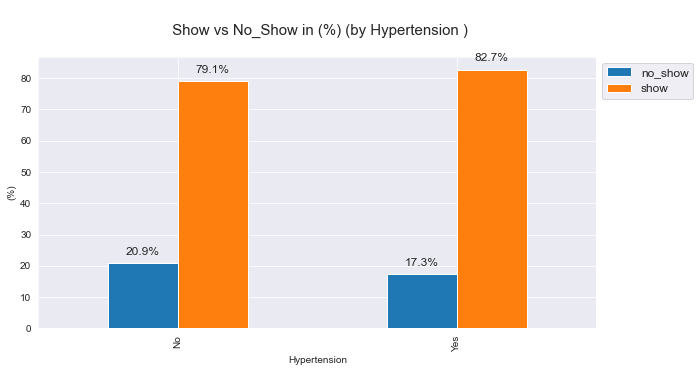

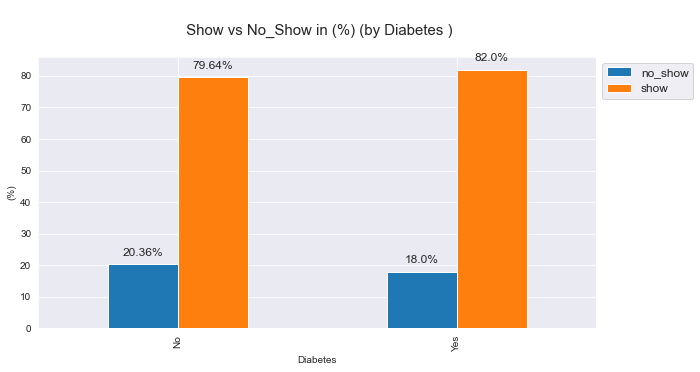

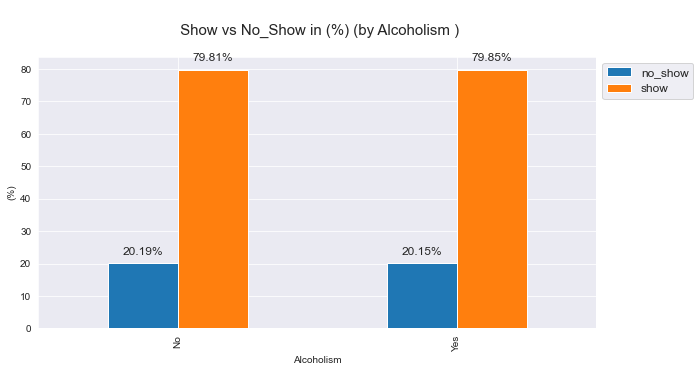

In [227]:
# use the function to make a comparison in terms of ["Scholarship","Hypertension" , "Diabetes" , "Alcoholism" ]
category_columns = ["Scholarship","Hypertension" , "Diabetes" , "Alcoholism" ]
for i in category_columns:
    attendance =bar_plots(df_clean, i)
    

> - Patients who have Scholarship are less committed to to attend by 3.94‬ % compared to patients without scholarship
> - Patients with Hypertension are more committed to attend by 3.6 %compared to patients without Hypertension
> - Patients with Diabetes are more committed to attend by 2.36 %compared to patients without Diabetes
> - The level of commitment for patients who whth Alcoholism and who don't are almost the same with different in percentage 0.04% towrads the patients with Alcoholism

----
----
### Question 5 : Does recieving the SMS influence showing up?

An overview look

In [228]:
# cheching the behavior of attenance after reciving the sms vs not reciving the sms
count = df_clean.groupby('SMS_received').Attendance.value_counts()
print(count)

SMS_received  Attendance
No            show          62509
              no_show       12529
Yes           show          25698
              no_show        9784
Name: Attendance, dtype: int64


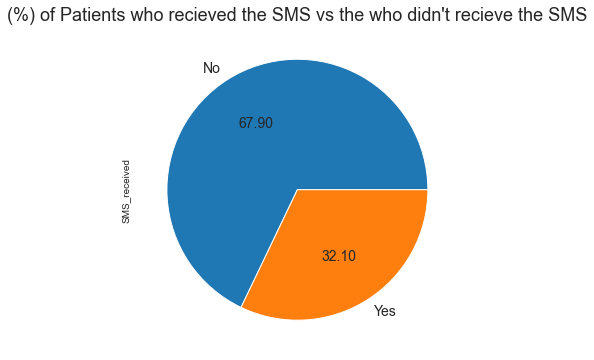

In [229]:
plt.title ("(%) of Patients who recieved the SMS vs the who didn't recieve the SMS", fontsize=18)
df_clean['SMS_received'].value_counts().plot(figsize=(6,6),kind="pie",autopct='%.2f', textprops={'fontsize': 14});

- compare using a bar chart

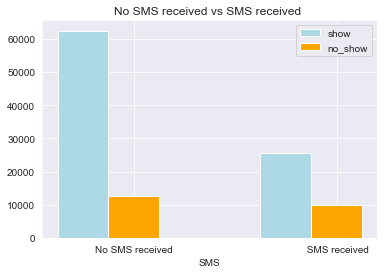

In [230]:
#patients who attended
attended=df_clean.SMS_received[show].value_counts()

#patients who didn't attend 
not_attended =df_clean.SMS_received[no_show].value_counts()

# setting bars cords 
X = np.arange(len(attended))
plt.bar(X, attended, width =0.25, color='lightblue' , label='show')
plt.bar(X+0.25, not_attended, width =0.25, color='orange',label='no_show')
locations=X+0.25
plt.xticks(locations,labels=['No SMS received' ,' SMS received'])
plt.legend()
plt.xlabel('SMS')
plt.title("No SMS received vs SMS received ");

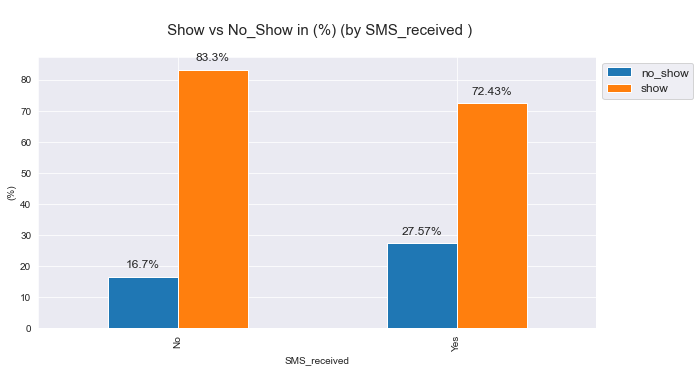

In [231]:
# check the precentage for showing vs no showing by sms recieved
sms=bar_plots(df_clean, 'SMS_received')

> - The total number of patients who didn't recieved the SMS is (75,038‬) which is significantly more than the patients who recieved the SMS which is (35,482) , That means that only 32.1% of the patient received the SMS
> - When comparing the attendance more attendance found for the patient who didn't recieve the SMS by 10.87%

----
----
### Question 6 : Is the Attendance affected by the severety of the Handicap?

* check the Handicap severity influence on Attendance

In [232]:
# check the Handicap severity influence on Attendance
# count of number of appointment for patients with Handicaps groupedby 'Handicap' & 'Attendance'
handi_counts = df_clean.groupby(['Handicap', 'Attendance']).count()['AppointmentID']
handi_counts

Handicap        Attendance
1 disabilities  no_show         363
                show           1676
2 disabilities  no_show          37
                show            146
3 disabilities  no_show           3
                show             10
4 disabilities  no_show           1
                show              2
No disability   no_show       21909
                show          86373
Name: AppointmentID, dtype: int64

In [233]:
# count of total number of appointment for patients with Handicaps, showed by disabilities
handi_totals = df_clean.groupby('Handicap').count()['AppointmentID']
handi_totals

Handicap
1 disabilities      2039
2 disabilities       183
3 disabilities        13
4 disabilities         3
No disability     108282
Name: AppointmentID, dtype: int64

In [234]:
# The percentage for each disability regarding Attendance
handi_percentage = handi_counts / handi_totals *100
handi_percentage

Handicap        Attendance
1 disabilities  no_show       17.802845
                show          82.197155
2 disabilities  no_show       20.218579
                show          79.781421
3 disabilities  no_show       23.076923
                show          76.923077
4 disabilities  no_show       33.333333
                show          66.666667
No disability   no_show       20.233280
                show          79.766720
Name: AppointmentID, dtype: float64

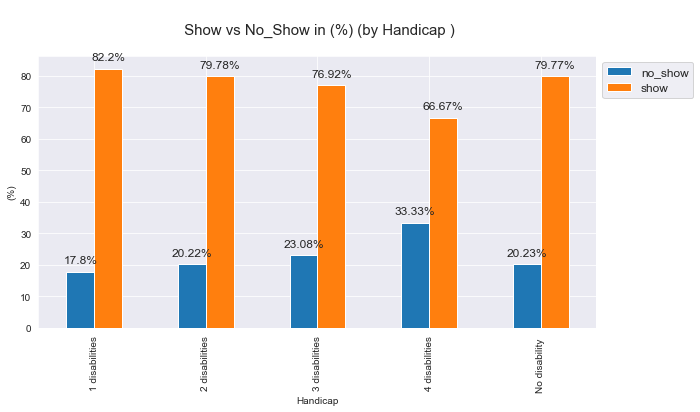

In [235]:
# bar plot for our findings
df_Hndcp =  bar_plots(df_clean, 'Handicap')

> - Most of the patients has no disability as they represent 97.9% of the appointments. However they has the 3rd attendance rate in comparision to the others with 79.77 % almost as the attendance of patients with two disabilities which is 79.78%
> - We find more commitment in the patiens with one disability as they has the highest attendance rate 82% of their appointment.
> - Then we find a decrease in the rate of attendance as higher the number of the disability with the lowest 66.67 % for patients with 4 disabilities

---
---
<a id='conclusions'></a>
## Conclusions

- Overall Number of patients who show up are more than who don't show, number of no show patients are 20.19 %
- Females are inclined to make appointments more than the males, but males are slightly more committed to attend
- The younger the patient the higher number of appointments made, though we can notice that patients between 50 years old to 80 years old are more committed to show to the appointments
- Patients who don't have Scholarships are more committed in attending the appointments than the patients who have scholarship
- Patients who have "Hypertension" are more committed in attending the appointments compared to the patients with no "Hypertension"
- Patients who have "Diabetes" are more committed in attending the appointments compared to the patients with no "Diabetes"
- Alcoholic patients are slightly less committed to attend that the patients who don't suffer from "Alcoholism" 
- Not a lot of patients received a reminder SMS, And the percentage of Attendance for the patients who received the SMS is lower than the patients who didn't receive the reminder.
- When comparing patients with more than one disability we notice that, patients with 4 disabilities has the least attendance percentage, while the patients with one disability has the highest attendance percentage


## Limitations
- There are a few wrong data need to be explatined, negative age values and wrong scheduling dates
- patients with ages from (0 to 5 has higher number of appointments, also The Females have higher number of appointments,it could be the mothers making the appointments for their children, and if that the case then the propotion of the genders need to be revaluated